# Dataset Creation

In [1]:
#Clear previously stored variables
%reset -f

## 1. Imports

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import nibabel as nib

## 2. Creating Lists of Image Paths and MGMT Labels


### 2.1 Glob Function

In [3]:
#taken from Ashley's classifier, not needed atm

import glob # for loading the data
def insensitive_glob(pattern):
    def either(c):
        return '[%s%s]' % (c.lower(), c.upper()) if c.isalpha() else c
    return glob.glob(''.join(map(either, pattern)))

### 2.2 Dataset - Ivy Foundation


#### 2.2.1 Loading Labels from Excel


In [4]:
ivy_data = pd.read_excel('/trials/Ivy_Foundation/Document_final/Ivy_OS_Data_September2018_JEG_edits.xlsx')
ivy_data = ivy_data[['ID', 'MGMT']]

ivy_labels = {}

for i in ivy_data.index:
    if (ivy_data['MGMT'][i] == "Methylated"):
        ivy_labels[ivy_data['ID'][i]] = 1
    elif (ivy_data['MGMT'][i] == "Unmethylated"):
        ivy_labels[ivy_data['ID'][i]] = 0


#### 2.2.2 Adding Labels and Image Path to Lists

In [5]:
ivy_root = '/trials/Ivy_Foundation/Final_for_Distribution'
ivy_flair = []
ivy_flair_mask = []
ivy_mgmt = []

#Pre
for key in ivy_labels.keys():
    flair_path = ivy_root + '/Pre/' + "{:05d}".format(key) + '/NIFTI_Native/flair.nii.gz'
    flair_mask_path = ivy_root + '/Pre/' + "{:05d}".format(key) + '/NIFTI_Native/FlairMask.nii.gz'
    
    if (os.path.isfile(flair_path)) and (os.path.isfile(flair_mask_path)):
        ivy_flair.append(flair_path)
        ivy_flair_mask.append(flair_mask_path)
        ivy_mgmt.append(ivy_labels[key])

#Post
for key in ivy_labels.keys():
    flair_path = ivy_root + '/Post/' + "{:05d}".format(key) + '/NIFTI_Native/flair.nii.gz'
    flair_mask_path = ivy_root + '/Post/' + "{:05d}".format(key) + '/NIFTI_Native/FlairMask.nii.gz'
    
    if (os.path.isfile(flair_path)) and (os.path.isfile(flair_mask_path)):
        ivy_flair.append(flair_path)
        ivy_flair_mask.append(flair_mask_path)
        ivy_mgmt.append(ivy_labels[key])

print(len(ivy_flair))

assert(len(ivy_flair) == len(ivy_mgmt))
assert(len(ivy_flair) == len(ivy_flair_mask))

656


### 2.3 Dataset - Atlas Concatenated

#### 2.3.1 Loading Labels from Excel


In [6]:
atlas_data = pd.read_excel('/trials/Atlas_Concatenated/AVAglio/AVAglio_Info_For_Atlas.xlsx', header=1)
atlas_data = atlas_data[['PT', 'S_MGMT']]

atlas_labels = {}

for i in atlas_data.index:
    if (atlas_data['S_MGMT'][i] == 1):
        atlas_labels[atlas_data['PT'][i]] = 1
    elif (atlas_data['S_MGMT'][i] == 0):
        atlas_labels[atlas_data['PT'][i]] = 0


#### 2.3.2 Adding Labels and Image Paths to List


In [7]:
atlas_root = '/trials/Atlas_Concatenated/AVAglio'
atlas_flair = []
atlas_flair_mask = []
atlas_mgmt = []

for key in atlas_labels.keys():
    flair_path = atlas_root + '/Flair/AVAglio-flair_' + "{:04d}".format(key) + '.nii.gz'
    flair_mask_path = atlas_root + '/Flair_Masks/AVAglio-flairmask_' + "{:04d}".format(key) + '.nii.gz'
    
    if (os.path.isfile(flair_path)) and (os.path.isfile(flair_mask_path)):
        atlas_flair.append(flair_path)
        atlas_flair_mask.append(flair_mask_path)
        atlas_mgmt.append(atlas_labels[key])

print(len(atlas_flair))

assert(len(atlas_flair) == len(atlas_mgmt))
assert(len(atlas_flair) == len(atlas_flair_mask))

600


## 3. Create Data Dictionaries

In [8]:
dataset_ivy = pd.DataFrame(np.column_stack([ivy_flair, ivy_flair_mask, ivy_mgmt]), columns=['Flair', 'Flair_Mask', 'MGMT'])
dataset_atlas = pd.DataFrame(np.column_stack([atlas_flair, atlas_flair_mask, atlas_mgmt]), columns=['Flair', 'Flair_Mask', 'MGMT'])

dataset_all = result = pd.concat([dataset_ivy, dataset_atlas])
print("Initial list  size  All - "  + str(dataset_all.shape))
dataset_all.head()

Initial list  size  All - (1256, 3)


,Flair,Flair_Mask,MGMT
0,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,0
1,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,1
2,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,1
3,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,0
4,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,1


## 4. Check Dataset

### 4.1 Dataset Distribution

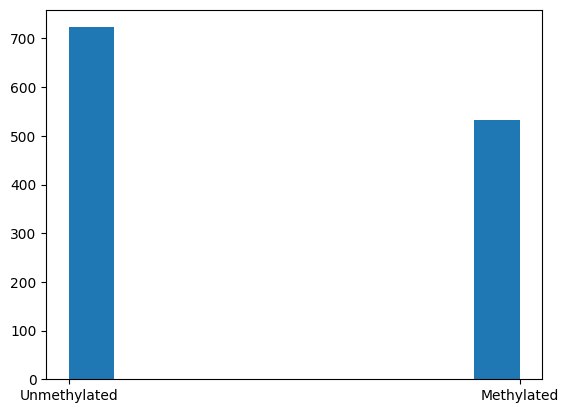

In [9]:
import matplotlib.pyplot as plt

bins = [0,1]
classes = ["Unmethylated", "Methylated"]
plt.hist(dataset_all["MGMT"])
plt.xticks(bins, labels=classes)
plt.show()

## 5. Shuffle and Split Dataset

### 5.1 Shuffle the Dataset


In [10]:
# Shuffle dataframe and reset indices
dataset_all = dataset_all.sample(frac=1, random_state=3)
dataset_all = dataset_all.reset_index(drop=True)
dataset_all.head()

,Flair,Flair_Mask,MGMT
0,/trials/Atlas_Concatenated/AVAglio/Flair/AVAgl...,/trials/Atlas_Concatenated/AVAglio/Flair_Masks...,0
1,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,0
2,/trials/Atlas_Concatenated/AVAglio/Flair/AVAgl...,/trials/Atlas_Concatenated/AVAglio/Flair_Masks...,0
3,/trials/Atlas_Concatenated/AVAglio/Flair/AVAgl...,/trials/Atlas_Concatenated/AVAglio/Flair_Masks...,1
4,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,1


### 5.2 Train/Valid/Test Split

In [11]:
train_size = int(dataset_all.shape[0] * 0.8)
valid_size = int(dataset_all.shape[0] * 0.1)
test_size = int(dataset_all.shape[0] * 0.1)

print(train_size, valid_size, test_size)

dictionary_train = [
    {"Flair_Image": a, "Flair_Path": b, "Flair_Mask_Image": c, "Flair_Mask_Path": d, "MGMT": e}
    for a, b, c, d, e in zip(dataset_all[:train_size].Flair, dataset_all[:train_size].Flair, dataset_all[:train_size].Flair_Mask, dataset_all[:train_size].Flair_Mask, dataset_all[:train_size].MGMT)
]

dictionary_valid = [
    {"Flair_Image": a, "Flair_Path": b, "Flair_Mask_Image": c, "Flair_Mask_Path": d, "MGMT": e}
    for a, b, c, d, e in zip(dataset_all[train_size:train_size+valid_size].Flair, dataset_all[train_size:train_size+valid_size].Flair, dataset_all[train_size:train_size+valid_size].Flair_Mask, dataset_all[train_size:train_size+valid_size].Flair_Mask, dataset_all[train_size:train_size+valid_size].MGMT)
]

dictionary_test = [
    {"Flair_Image": a, "Flair_Path": b, "Flair_Mask_Image": c, "Flair_Mask_Path": d, "MGMT": e}
    for a, b, c, d, e in zip(dataset_all[-test_size:].Flair, dataset_all[-test_size:].Flair, dataset_all[-test_size:].Flair_Mask, dataset_all[-test_size:].Flair_Mask, dataset_all[-test_size:].MGMT)
]

print(len(dictionary_train), len(dictionary_valid), len(dictionary_test))

1004 125 125
1004 125 125


### 5.3 Visualize Distribution of Each Split

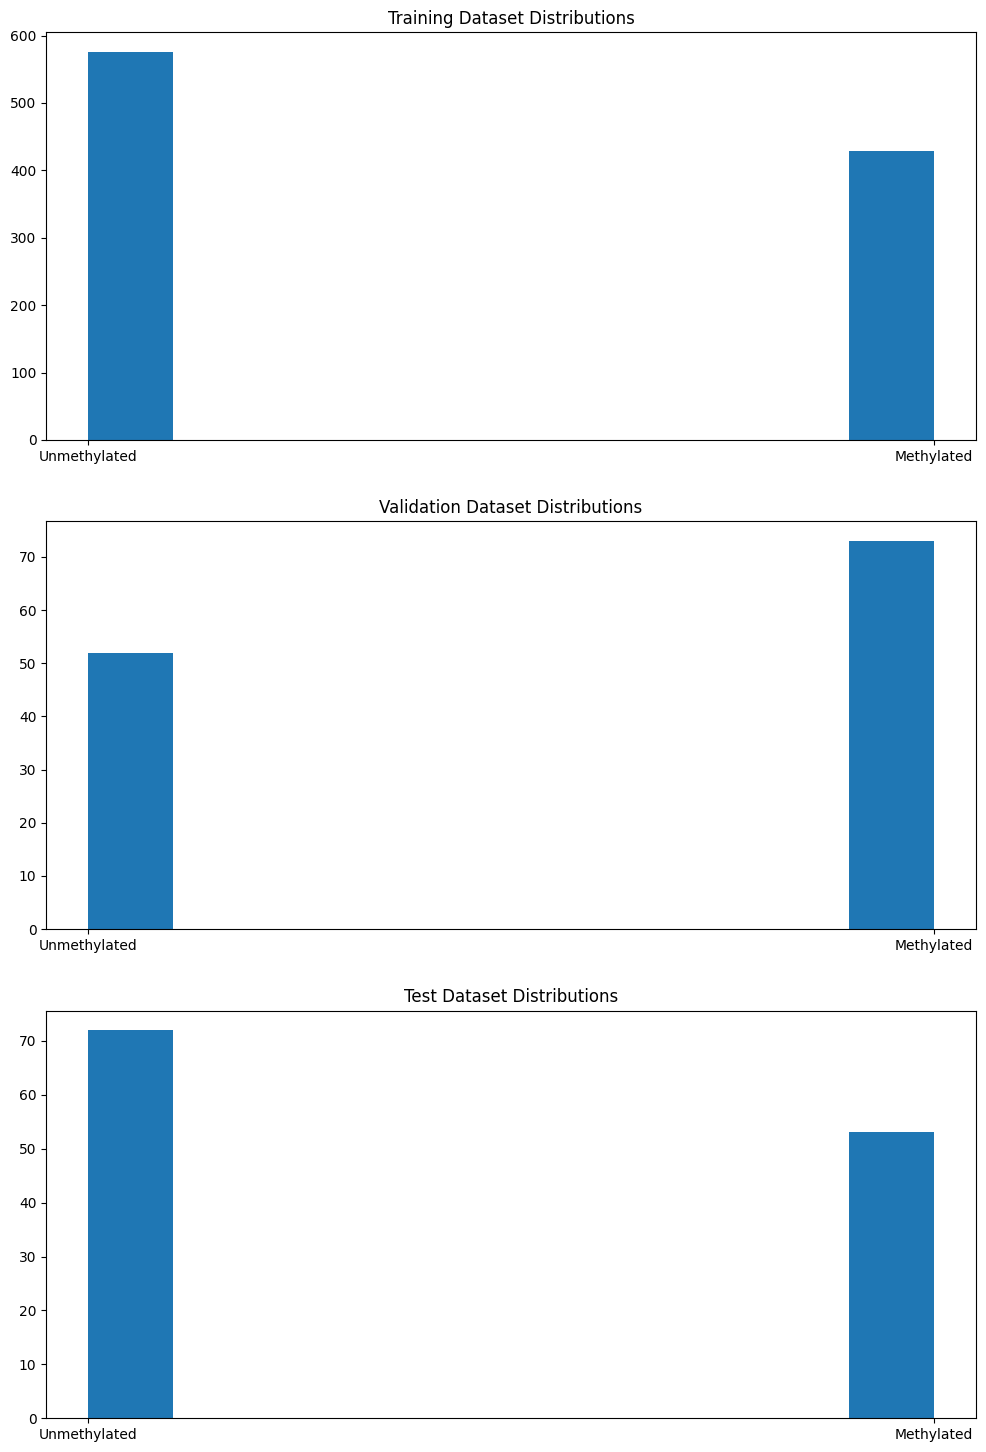

In [12]:
bins = [0, 1]
mgmt_status = ["Unmethylated", "Methylated"]


plt.figure("distributions", (12,18))

plt.subplot(3, 1, 1)
plt.title("Training Dataset Distributions")
plt.hist(dataset_all[:train_size].MGMT)
plt.xticks(bins, labels=mgmt_status)

plt.subplot(3, 1, 2)
plt.title("Validation Dataset Distributions")
plt.hist(dataset_all[train_size:train_size+valid_size].MGMT)
plt.xticks(bins, labels=mgmt_status)

plt.subplot(3, 1, 3)
plt.title("Test Dataset Distributions")
plt.hist(dataset_all[-test_size:].MGMT)
plt.xticks(bins, labels=mgmt_status)

plt.show()

## 6. Store Datasets

In [13]:
%store dictionary_train
%store dictionary_valid
%store dictionary_test

Stored 'dictionary_train' (list)
Stored 'dictionary_valid' (list)
Stored 'dictionary_test' (list)
